In [1]:
import csv
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import heapq
from queue import PriorityQueue

In [2]:
def csv_data(file):
    filename = open(file)   # Opening the file
    rows = []
    csvreader = csv.reader(filename)  # storing the file object in the csvreader

    for row in csvreader:   # Extracting each data row one by one
        rows.append(row)    # Apeending the data to the rows variable
    return rows

In [3]:
data = csv_data('tubedata.csv')
data

[['Harrow & Wealdstone', ' "Kenton"', ' "Bakerloo"', ' 3', ' "5"', ' "0"'],
 ['Kenton', ' "South Kenton"', ' "Bakerloo"', ' 2', ' "4"', ' "0"'],
 ['South Kenton', ' "North Wembley"', ' "Bakerloo"', ' 2', ' "4"', ' "0"'],
 ['North Wembley', ' "Wembley Central"', ' "Bakerloo"', ' 2', ' "4"', ' "0"'],
 ['Wembley Central',
  ' "Stonebridge Park"',
  ' "Bakerloo"',
  ' 3',
  ' "4"',
  ' "0"'],
 ['Stonebridge Park', ' "Harlesden"', ' "Bakerloo"', ' 2', ' "3"', ' "0"'],
 ['Harlesden', ' "Willesden Junction"', ' "Bakerloo"', ' 2', ' "3"', ' "0"'],
 ['Willesden Junction',
  ' "Kensal Green"',
  ' "Bakerloo"',
  ' 3',
  ' "3"',
  ' "0"'],
 ['Kensal Green', ' "Queen\'s Park"', ' "Bakerloo"', ' 3', ' "2"', ' "0"'],
 ["Queen's Park", ' "Kilburn Park"', ' "Bakerloo"', ' 2', ' "2"', ' "0"'],
 ['Kilburn Park', ' "Maida Vale"', ' "Bakerloo"', ' 2', ' "2"', ' "0"'],
 ['Maida Vale', ' "Warwick Avenue"', ' "Bakerloo"', ' 1', ' "2"', ' "0"'],
 ['Warwick Avenue', ' "Paddington"', ' "Bakerloo"', ' 2', ' "2"'

In [4]:
data[342][1] = data[342][1]+","+data[342][2]+","+data[342][3]

In [5]:
#Data at the 3rd col on 343rd row will be deleted
del data[342][2] #Just be careful to not run this two times

In [6]:
#Now from the new updated data after deleting that col, we will again delete the 3rd col at 343rd row
del data[342][2]#Just be careful to not run this two times

In [7]:
#This will strip every coloumn in a row any extra space or characters such as ' or " or / 
for row in data:
    row[0] = row[0].strip(' "\'\t\r\n')
    row[1] = row[1].strip(' "\'\t\r\n')
    row[2] = row[2].strip(' "\'\t\r\n')
    row[3] = int(row[3].strip(' "\'\t\r\n'))
    row[4] = row[4].strip(' "\'\t\r\n')
    row[5] = row[5].strip(' "\'\t\r\n')

In [8]:
data

[['Harrow & Wealdstone', 'Kenton', 'Bakerloo', 3, '5', '0'],
 ['Kenton', 'South Kenton', 'Bakerloo', 2, '4', '0'],
 ['South Kenton', 'North Wembley', 'Bakerloo', 2, '4', '0'],
 ['North Wembley', 'Wembley Central', 'Bakerloo', 2, '4', '0'],
 ['Wembley Central', 'Stonebridge Park', 'Bakerloo', 3, '4', '0'],
 ['Stonebridge Park', 'Harlesden', 'Bakerloo', 2, '3', '0'],
 ['Harlesden', 'Willesden Junction', 'Bakerloo', 2, '3', '0'],
 ['Willesden Junction', 'Kensal Green', 'Bakerloo', 3, '3', '0'],
 ['Kensal Green', "Queen's Park", 'Bakerloo', 3, '2', '0'],
 ["Queen's Park", 'Kilburn Park', 'Bakerloo', 2, '2', '0'],
 ['Kilburn Park', 'Maida Vale', 'Bakerloo', 2, '2', '0'],
 ['Maida Vale', 'Warwick Avenue', 'Bakerloo', 1, '2', '0'],
 ['Warwick Avenue', 'Paddington', 'Bakerloo', 2, '2', '0'],
 ['Paddington', 'Edgware Road', 'Bakerloo', 3, '1', '0'],
 ['Edgware Road', 'Marylebone', 'Bakerloo', 2, '1', '0'],
 ['Marylebone', 'Baker Street', 'Bakerloo', 1, '1', '0'],
 ['Baker Street', "Regent's Par

In [9]:
def plot_graph(data):
    tube_graph = nx.MultiGraph()    # Create empty graph
    
    for row in data:
        tube_graph.add_node(row[0])   #Add 0th column node of the row to the graph
        tube_graph.add_node(row[1])   #Add 1st column node of the row to the graph
        weight = row[3]   #Extract the weight from 4th column
        tube_graph.add_edge(row[0], row[1], weight = weight)    #Add an edge between between nodes row[0] and row[1] along with the weight
    
    return tube_graph

In [10]:
tube_graph = plot_graph(data)

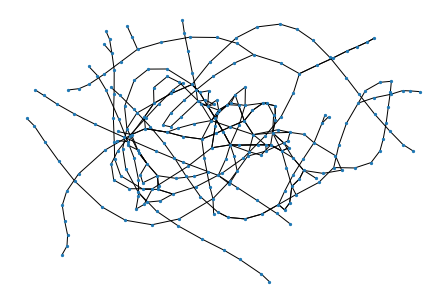

In [11]:
#Visualizing the graph
nx.draw(tube_graph, with_labels=None, node_size=5, font_weight='bold')
plt.show()

In [12]:
len(tube_graph)

271

In [13]:
def depth_first_search(tube_graph, start_node, end_node, reverse=False):
    
    stack = [{'label':start_node, 'parent':None}]  
    explored = {start_node}
    number_of_explored_nodes = 1 

    while stack:
        node = stack.pop() # pop from the right of the list
        number_of_explored_nodes = number_of_explored_nodes + 1
        if node['label'] == end_node:
            return node, number_of_explored_nodes

        neighbours = tube_graph.neighbors(node['label'])
        for children in neighbours:

            child = {'label':children, 'parent':node}
            if children not in explored:
                stack.append(child) # added to the right of the list, so it is a LIFO
                explored.add(children)      
    return None

In [14]:
def path_from_root(node):
    
    path = [node['label']]
    while node['parent']:
        node = node['parent']
        path = [node['label']] + path
    return path

In [15]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'Euston','Victoria')
path_dfs = path_from_root(solution_dfs)

In [16]:
cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost

In [17]:
print("DFS Path from Euston to Victoria :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from Euston to Victoria :-> ['Euston', "King's Cross St. Pancras", 'Russell Square', 'Holborn', 'Covent Garden', 'Leicester Square', 'Piccadilly Circus', 'Green Park', 'Victoria']
Cost of DFS :-> 13
Nodes Visited by DFS :-> 26


In [18]:
def breadth_first_graph_search(tube_graph, start_node, end_node, reverse=False):
    
    if start_node == end_node: # just in case, because now we are checking the children
        return None
    
    number_of_explored_nodes = 1    
    frontier = [{'label':start_node, 'parent':None}]  
    # FIFO queue should NOT be implemented with a list, this is slow! better to use deque
    explored = {start_node}
    
    while frontier:
        node = frontier.pop() # pop from the right of the list
        
        neighbours = tube_graph.neighbors(node['label'])

        for child_label in neighbours:
            child = {'label':child_label, 'parent':node}
            if child_label == end_node:
                return child, number_of_explored_nodes
 
            if child_label not in explored:
                frontier = [child] + frontier # added to the left of the list, so a FIFO!
                number_of_explored_nodes += 1
                explored.add(child_label)
            
    return None

In [19]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'Euston', 'Victoria')
path_bfs = path_from_root(solution_bfs)

In [20]:
cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost

In [21]:
print("BFS Path from Euston to Victoria :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from Euston to Victoria :-> ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']
Cost of BFS :-> 7
Nodes Visited by BFS :-> 34


In [22]:
def uniform_cost_search(tube_graph, start_node, end_node):
    stack = []
    stack_index = {}
    explored = set()
    
    node = (0, start_node, [start_node])
    stack_index[node[1]] = [node[0], node[2]]
    nodes_explored=0

    # Add the node in front of the stack
    heapq.heappush(stack, node)
    
    while stack:
        if len(stack) == 0:
            return None
        
        node = heapq.heappop(stack)
        del stack_index[node[1]]    # Deletes the popped element

        if node[1] == end_node:     #Checks if the goal state is reached
            return node[2],node[0], nodes_explored + 1
        
        explored.add(node[1])
        neighbours = list(tube_graph.neighbors(node[1])) #Evaluates all the children of the current node
        path = node[2]
        
        for child in neighbours:
            path.append(child)
            data = tube_graph.get_edge_data(node[1], child)[0]['weight']
            childNode = (node[0] + data, child, path) #New child node is created 

            if child not in explored and child not in stack_index: #Checks if the child node has already been explored
                heapq.heappush(stack, childNode) #If not then adds it to the stack
                stack_index[child] = [childNode[0], childNode[2]]
                nodes_explored = nodes_explored + 1
            elif child in stack_index:
                if childNode[0] < stack_index[child][0]: #Evaluates the minimum cost
                    delete_node = (stack_index[child][0], child, stack_index[child][1])
                    stack.remove(delete_node)
                    heapq.heapify(stack)
                    del stack_index[child]

                    heapq.heappush(stack, childNode)
                    stack_index[child] = [childNode[0], childNode[2]]
            path = path[:-1]

In [23]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'Euston', 'Victoria')

In [24]:
print("UCS Path from Euston to Victoria :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Euston to Victoria :-> ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']
Cost of UCS: 7
Nodes Visited by UCS :-> 48


In [25]:
# Question 2.2

In [26]:
# Canada Water to Stratford

In [27]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'Canada Water', 'Stratford')
path_dfs = path_from_root(solution_dfs)

cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost
    
print("DFS Path from Canada Water to Stratford :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from Canada Water to Stratford :-> ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']
Cost of DFS :-> 15
Nodes Visited by DFS :-> 7


In [28]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'Canada Water', 'Stratford')
path_bfs = path_from_root(solution_bfs)

cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost
    
print("BFS Path from Canada Water to Stratford :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from Canada Water to Stratford :-> ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']
Cost of BFS :-> 15
Nodes Visited by BFS :-> 39


In [29]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'Canada Water', 'Stratford')

print("UCS Path from Canada Water to Stratford :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Canada Water to Stratford :-> ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']
Cost of UCS: 14
Nodes Visited by UCS :-> 63


In [30]:
# New Cross Gate to Stepney Green

In [31]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'New Cross Gate', 'Stepney Green')
path_dfs = path_from_root(solution_dfs)

cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost
    
print("DFS Path from New Cross Gate to Stepney Green :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from New Cross Gate to Stepney Green :-> ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford', 'Mile End', 'Stepney Green']
Cost of DFS :-> 27
Nodes Visited by DFS :-> 33


In [32]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'New Cross Gate', 'Stepney Green')
path_bfs = path_from_root(solution_bfs)

cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost
    
print("BFS Path from New Cross Gate to Stepney Green :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from New Cross Gate to Stepney Green :-> ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
Cost of BFS :-> 14
Nodes Visited by BFS :-> 25


In [33]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'New Cross Gate', 'Stepney Green')

print("UCS Path from New Cross Gate to Stepney Green :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from New Cross Gate to Stepney Green :-> ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
Cost of UCS: 14
Nodes Visited by UCS :-> 28


In [34]:
# Ealing Broadway to South Kensington

In [35]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'Ealing Broadway', 'South Kensington')
path_dfs = path_from_root(solution_dfs)

cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost
    
print("DFS Path from Ealing Broadway to South Kensington :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from Ealing Broadway to South Kensington :-> ['Ealing Broadway', 'Ealing Common', 'North Ealing', 'Park Royal', 'Alperton', 'Sudbury Town', 'Sudbury Hill', 'South Harrow', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'Northwick Park', 'Preston Road', 'Wembley Park', 'Finchley Road', 'Baker Street', 'Bond Street', 'Green Park', 'Victoria', 'Sloane Square', 'South Kensington']
Cost of DFS :-> 57
Nodes Visited by DFS :-> 180


In [36]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'Ealing Broadway', 'South Kensington')
path_bfs = path_from_root(solution_bfs)

cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost
    
print("BFS Path from Ealing Broadway to South Kensington :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from Ealing Broadway to South Kensington :-> ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
Cost of BFS :-> 20
Nodes Visited by BFS :-> 49


In [37]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'Ealing Broadway', 'South Kensington')

print("UCS Path from Ealing Broadway to South Kensington :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Ealing Broadway to South Kensington :-> ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
Cost of UCS: 20
Nodes Visited by UCS :-> 59


In [38]:
# Baker Street to Wembley Park

In [39]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'Baker Street', 'Wembley Park')
path_dfs = path_from_root(solution_dfs)

cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost
    
print("DFS Path from Baker Street to Wembley Park :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from Baker Street to Wembley Park :-> ['Baker Street', 'Finchley Road', 'Wembley Park']
Cost of DFS :-> 13
Nodes Visited by DFS :-> 4


In [40]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'Baker Street', 'Wembley Park')
path_bfs = path_from_root(solution_bfs)

cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost
    
print("BFS Path from Baker Street to Wembley Park :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from Baker Street to Wembley Park :-> ['Baker Street', 'Finchley Road', 'Wembley Park']
Cost of BFS :-> 13
Nodes Visited by BFS :-> 15


In [41]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'Baker Street', 'Wembley Park')

print("UCS Path from Baker Street to Wembley Park :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Baker Street to Wembley Park :-> ['Baker Street', 'Finchley Road', 'Wembley Park']
Cost of UCS: 13
Nodes Visited by UCS :-> 102


In [42]:
# Woodford to Whitechapel

In [43]:
solution_dfs, nodes_visited_dfs = depth_first_search(tube_graph, 'Woodford', 'Whitechapel')
path_dfs = path_from_root(solution_dfs)

cost_dfs = 0
for i in range(1,len(path_dfs)):
    edge_weight = tube_graph.get_edge_data(path_dfs[i-1], path_dfs[i])
    cost = edge_weight[0]['weight']
    cost_dfs = cost_dfs + cost
    
print("DFS Path from Woodford to Whitechapel :-> {}".format(path_dfs))
print("Cost of DFS :-> {}".format(cost_dfs))
print("Nodes Visited by DFS :-> {}".format(nodes_visited_dfs))

DFS Path from Woodford to Whitechapel :-> ['Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'West Ham', 'Canning Town', 'North Greenwich', 'Canary Wharf', 'Canada Water', 'Bermondsey', 'London Bridge', 'Borough', 'Elephant & Castle', 'Kennington', 'Oval', 'Stockwell', 'Vauxhall', 'Pimlico', 'Victoria', 'Green Park', 'Oxford Circus', 'Warren Street', 'Euston', "King's Cross St. Pancras", 'Angel', 'Old Street', 'Moorgate', 'Liverpool Street', 'Aldgate East', 'Whitechapel']
Cost of DFS :-> 71
Nodes Visited by DFS :-> 78


In [44]:
solution_bfs, nodes_visited_bfs = breadth_first_graph_search(tube_graph, 'Woodford', 'Whitechapel')
path_bfs = path_from_root(solution_bfs)

cost_bfs = 0
for i in range(1,len(path_bfs)):
    edge_weight = tube_graph.get_edge_data(path_bfs[i-1], path_bfs[i])
    cost = edge_weight[0]['weight']
    cost_bfs = cost_bfs + cost
    
print("BFS Path from Woodford to Whitechapel :-> {}".format(path_bfs))
print("Cost of BFS :-> {}".format(cost_bfs))
print("Nodes Visited by BFS :-> {}".format(nodes_visited_bfs))

BFS Path from Woodford to Whitechapel :-> ['Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'Mile End', 'Stepney Green', 'Whitechapel']
Cost of BFS :-> 20
Nodes Visited by BFS :-> 30


In [45]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = uniform_cost_search(tube_graph, 'Woodford', 'Whitechapel')

print("UCS Path from Baker Street to Wembley Park :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Baker Street to Wembley Park :-> ['Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'Mile End', 'Stepney Green', 'Whitechapel']
Cost of UCS: 20
Nodes Visited by UCS :-> 40


In [46]:
#2.3 Extending the cost function

In [47]:
for row in data:
    tube_graph.add_node(row[0])   
    tube_graph.add_node(row[1]) 
    tubeline = row[2]
    weight = row[3]
    main_zone = row[4]
    secondary_zone = row[5]
    tube_graph.add_edge(row[0], row[1], tubeline=tubeline, weight=weight, main_zone=main_zone,secondary_zone=secondary_zone)

In [48]:
def improved_uniform_cost_search(tube_graph, start_node, end_node):
    stack = []
    stack_index = {}
    explored = set()
    
    node = (0, start_node, [start_node])
    stack_index[node[1]] = [node[0], node[2]]
    nodes_explored=0

    # Add the node in front of the stack
    heapq.heappush(stack, node)
    
    while stack:
        if len(stack) == 0:
            return None
        
        node = heapq.heappop(stack)
        del stack_index[node[1]]    # Deletes the popped element

        if node[1] == end_node:     #Checks if the goal state is reached
            return node[2],node[0], nodes_explored + 1
        
        explored.add(node[1])
        neighbours = list(tube_graph.neighbors(node[1])) #Evaluates all the children of the current node
        path = node[2]
        
        for child in neighbours:
            path.append(child)
            data = tube_graph.get_edge_data(node[1], child)[0]['weight']
            childNode = (node[0] + data, child, path) #New child node is created 

            if child not in explored and child not in stack_index: #Checks if the child node has already been explored
                heapq.heappush(stack, childNode) #If not then adds it to the stack
                stack_index[child] = [childNode[0], childNode[2]]
                nodes_explored = nodes_explored + 1
            elif child in stack_index:
                if childNode[0] < stack_index[child][0]: #Evaluates the minimum cost
                    delete_node = (stack_index[child][0], child, stack_index[child][1])
                    stack.remove(delete_node)
                    heapq.heapify(stack)
                    del stack_index[child]

                    heapq.heappush(stack, childNode)
                    stack_index[child] = [childNode[0], childNode[2]]
            path = path[:-1]

In [49]:
ucs_solution,time_cost_ucs ,nodes_visited_ucs = improved_uniform_cost_search(tube_graph, 'Woodford', 'Whitechapel')

print("UCS Path from Baker Street to Wembley Park :-> {}".format(ucs_solution))
print("Cost of UCS:",time_cost_ucs)
print("Nodes Visited by UCS :-> {}".format(nodes_visited_ucs))

UCS Path from Baker Street to Wembley Park :-> ['Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'Mile End', 'Stepney Green', 'Whitechapel']
Cost of UCS: 20
Nodes Visited by UCS :-> 40


In [50]:
#2.4 Heuristic Search

In [51]:
def calculate_heuristic(a,b):
    current_zone = 0
    end_zone=0
    zone_difference = 0
    for item in tube_graph:
        if(item[0]==a):
            current_zone=item[4]
            break;
    for items in tube_graph:
        if(items[0]==b):
            end_zone=items[4]
            break;       
    if str(current_zone).isdigit() and str(end_zone).isdigit():
        current_zone = int(current_zone)
        end_zone = int(end_zone)
        zone_difference = abs(end_zone - current_zone)

    return zone_difference

In [52]:
def A_star(tube_graph, start_node, end_node):
    admissible_heuristics = {} # Will save the values of h so i don't need to calculate multiple times for every node
    h = calculate_heuristic(start_node,end_node)
    admissible_heuristics[start_node] = h
    visited_nodes = {} # This will contain the data of how to get to any node
    visited_nodes[start_node] = (h, [start_node]) # I add the data for the origin node: "Travel cost + heuristic", "Path to get there" and "Admissible Heuristic"

    paths_to_explore = PriorityQueue()
    paths_to_explore.put((h, [start_node], 0)) # Add the origin node to paths to explore, also add cost without h
# I add the total cost, as well as the path to get there (they will be sorted automatically)

    while not paths_to_explore.empty(): # While there are still paths to explore
        # Pop elemenet with lower path cost in the queue
        _, path, total_cost = paths_to_explore.get()
        current_node = path[-1]
        neighbors = tube_graph.neighbors(current_node) # I get all the neighbors of the current path

        for neighbor in neighbors:
            edge_data = tube_graph.get_edge_data(path[-1], neighbor)
            if "weight" in edge_data:
                cost_to_neighbor = edge_data["weight"] # If the graph has weights
            else:
                cost_to_neighbor = 1 # If the graph does not have weights I use 1

            if neighbor in admissible_heuristics:
                h = admissible_heuristics[neighbor]
            else:
                h = calculate_heuristic(neighbor,end_node)
                admissible_heuristics[neighbor] = h

            new_cost = total_cost + cost_to_neighbor
            new_cost_plus_h = new_cost + h
            if (neighbor not in visited_nodes) or (visited_nodes[neighbor][0]>new_cost_plus_h): # If this node was never explored, or the cost to get there is better than te previous ones
                next_node = (new_cost_plus_h, path+[neighbor], new_cost)
                visited_nodes[neighbor] = next_node # Update the node with best value
                paths_to_explore.put(next_node) # Also will add it as a possible path to explore
    return visited_nodes[end_node] # I will return the goal information, it will have both the total cost and the path

In [53]:
goal = A_star(tube_graph, 'Woodford', 'Whitechapel')
print("Path found by heuristic from Woodford to Whitechapel:- ",goal[1])
print("Cost of the heuristic :- ",goal[0])

Path found by heuristic from Woodford to Whitechapel:-  ['Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'Mile End', 'Stepney Green', 'Whitechapel']
Cost of the heuristic :-  8


In [54]:
goal = A_star(tube_graph, 'Ealing Broadway', 'South Kensington')
print("Path found by heuristic from Ealing Broadway to South Kensington:- ",goal[1])
print("Cost of the heuristic :- ",goal[0])

Path found by heuristic from Ealing Broadway to South Kensington:-  ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
Cost of the heuristic :-  8
